<a href="https://www.kaggle.com/code/albertobircoci/analysis-and-classification-happiness-index-score?scriptVersionId=229641448" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

This project presents an in-depth analysis, visualization, and classification of the World Happiness Index and Inflation dataset from Kaggle. The study focuses on the "Score" variable, which represents the happiness index score for each country. The dataset is examined through various factors such as GDP per Capita, Social Support, Healthy Life Expectancy at Birth, Freedom to Make Life Choices, Generosity, Perceptions of Corruption, and multiple inflation measures.

A comprehensive approach is applied, combining exploratory data analysis and advanced visualization techniques to reveal underlying patterns and correlations. In addition, several classification algorithms are implemented—including Logistic Regression, Support Vector Machines, Decision Trees, K-Nearest Neighbors, and Random Forest—to effectively categorize countries based on their happiness scores.

In [79]:
import pandas as pd
import numpy as np

df = pd.read_csv('/kaggle/input/world-happiness-index-and-inflation-dataset/WHI_Inflation.csv', delimiter='\t')
print(df.head())  # Display the first 5 rows

       Country  Year  Rank  Score  GDP per Capita  Social support  \
0  Afghanistan  2015   153  3.575        0.319820        0.302850   
1  Afghanistan  2016   154  3.360        0.382270        0.110370   
2  Afghanistan  2017   141  3.794        0.401477        0.581543   
3  Afghanistan  2018   145  3.632        0.332000        0.537000   
4  Afghanistan  2019   154  3.203        0.350000        0.517000   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                          0.303350                       0.23414    0.365100   
1                          0.173440                       0.16430    0.312680   
2                          0.180747                       0.10618    0.311871   
3                          0.255000                       0.08500    0.191000   
4                          0.361000                       0.00000    0.158000   

   Perceptions of corruption  Energy Consumer Price Inflation  \
0                   0.097190     

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



Checking missing values

In [80]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Country                                     0
Year                                        0
Rank                                        0
Score                                       0
GDP per Capita                              0
Social support                              0
Healthy life expectancy at birth            0
Freedom to make life choices                0
Generosity                                  0
Perceptions of corruption                   1
Energy Consumer Price Inflation           129
Food Consumer Price Inflation              89
GDP deflator Index growth rate             16
Headline Consumer Price Inflation          23
Official Core Consumer Price Inflation    483
Producer Price Inflation                  446
Continent                                  44
dtype: int64


In [81]:
print("\nData types:\n", df.dtypes)


Data types:
 Country                                    object
Year                                        int64
Rank                                        int64
Score                                     float64
GDP per Capita                            float64
Social support                            float64
Healthy life expectancy at birth          float64
Freedom to make life choices              float64
Generosity                                float64
Perceptions of corruption                 float64
Energy Consumer Price Inflation           float64
Food Consumer Price Inflation             float64
GDP deflator Index growth rate            float64
Headline Consumer Price Inflation         float64
Official Core Consumer Price Inflation    float64
Producer Price Inflation                  float64
Continent                                  object
dtype: object


The following plot displays the top 10 happiest countries based on the average happiness score across all years in the study, or alternatively for the data available from the current decade. In the latter case, the year for analysis can be adjusted as needed.


Top 10 countries by average (2015-2023):
          Country     Score
41       Finland  7.662744
34       Denmark  7.579733
53       Iceland  7.522278
122  Switzerland  7.493322
94        Norway  7.473889
89   Netherlands  7.417100
121       Sweden  7.343500
90   New Zealand  7.273844
24        Canada  7.230456
6      Australia  7.227089


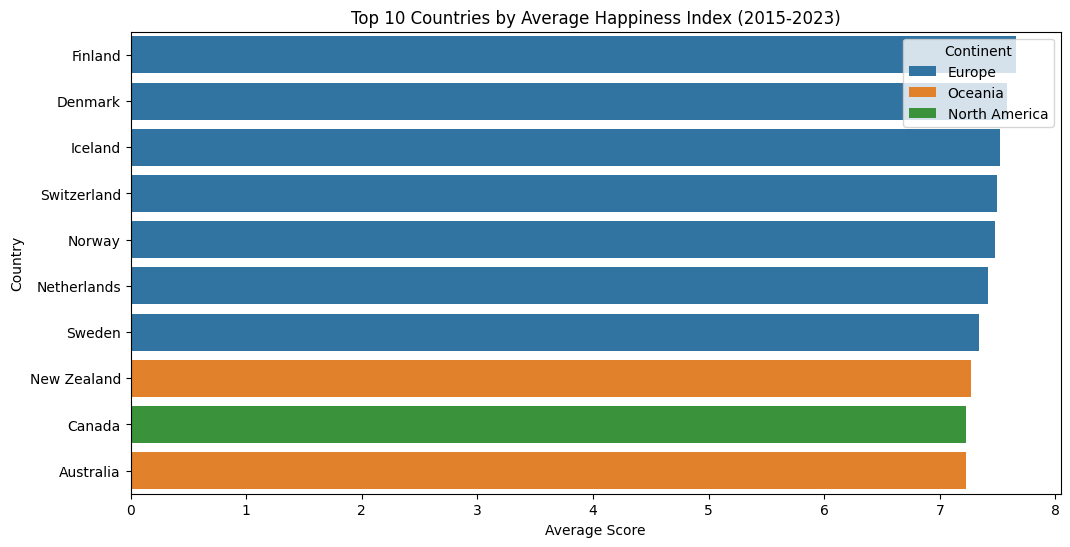


Top 10 countries by average (2021-2023):
          Country     Score
36       Finland  7.822333
30       Denmark  7.614000
48       Iceland  7.547000
111  Switzerland  7.441000
84   Netherlands  7.427333
110       Sweden  7.380667
89        Norway  7.357333
53        Israel  7.331333
67    Luxembourg  7.276000
85   New Zealand  7.200000


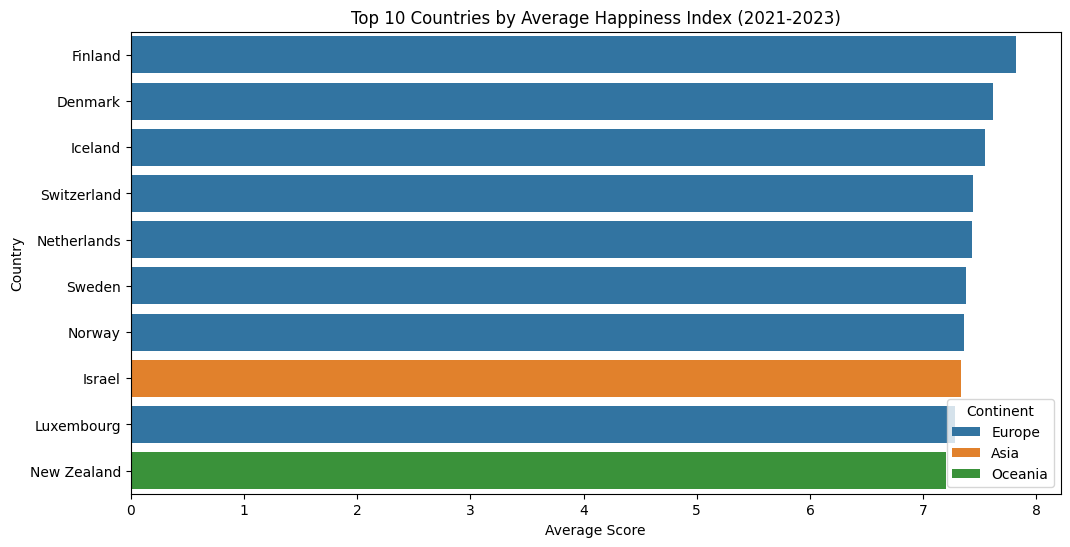

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
# TOP 10 COUNTRIES by AVERAGE HAPPINESS INDEX (2015-2023)

happiness_avg_all_years = df.groupby(['Country', 'Continent'])['Score'].mean().reset_index()
happiness_avg_all_years = happiness_avg_all_years.sort_values(by='Score', ascending=False).head(10)

print("\nTop 10 countries by average (2015-2023):\n", happiness_avg_all_years[['Country', 'Score']])

plt.figure(figsize=(12, 6))
sns.barplot(data=happiness_avg_all_years, x='Score', y='Country', hue='Continent', dodge=False)
plt.title("Top 10 Countries by Average Happiness Index (2015-2023)")
plt.xlabel("Average Score")
plt.ylabel("Country")
plt.show()

# TOP 10 COUNTRIES by AVERAGE HAPPINESS INDEX (2021-2023)
df_recent = df[df['Year'].isin([2021, 2022, 2023])]

happiness_avg_recent = df_recent.groupby(['Country', 'Continent'])['Score'].mean().reset_index()
happiness_avg_recent = happiness_avg_recent.sort_values(by='Score', ascending=False).head(10)

print("\nTop 10 countries by average (2021-2023):\n", happiness_avg_recent[['Country', 'Score']])

plt.figure(figsize=(12, 6))
sns.barplot(data=happiness_avg_recent, x='Score', y='Country', hue='Continent', dodge=False)
plt.title("Top 10 Countries by Average Happiness Index (2021-2023)")
plt.xlabel("Average Score")
plt.ylabel("Country")
plt.show()

The following code extracts the data for a specific country (set via the country_name variable) and plots the trend of its Happiness Index score from 2015 to 2023. A line plot with markers is generated to visualize the evolution of the score over the years, and a grid is added for clarity. Additionally, a table displaying the happiness scores per year is printed, allowing for a quick review of the data. The country name can be replaced to analyze trends for different nations.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Happiness Scores for Canada:
      Year   Score
203  2015  7.4270
204  2016  7.4040
205  2017  7.3160
206  2018  7.3280
207  2019  7.2780
208  2020  7.2321
209  2021  7.1030
210  2022  7.0250
211  2023  6.9610


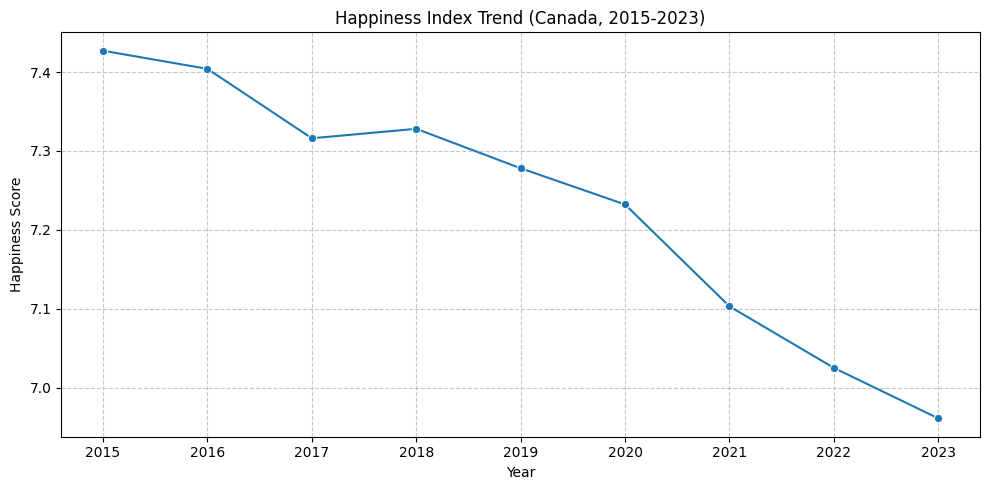

In [83]:
country_name = 'Canada' # Replace "Canada" with what country you are searcing for

df_country = df[df['Country'] == country_name]

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_country, x='Year', y='Score', marker='o')
plt.title(f"Happiness Index Trend ({country_name}, 2015-2023)")
plt.ylabel("Happiness Score")
plt.xticks(df_country['Year'].unique())  # Show all years
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

print(f"Happiness Scores for {country_name}:\n", df_country[['Year', 'Score']])

plt.show()

Rows with missing continent values will be identified and manually updated.

In [84]:
missing_continent = df[df['Continent'].isna()][['Country', 'Year', 'Continent']]
if not missing_continent.empty:
    print("Rows with missing 'Continent':")
    pd.set_option('display.max_rows', None)  
else:
    print("No missing values in the 'Continent' column.")

Rows with missing 'Continent':


In [85]:
continent_mapping = {
    'Burkina Faso': 'Africa',
    'Czech Republic': 'Europe',
    'Kosovo': 'Europe',
    'Myanmar': 'Asia',
    'North Macedonia': 'Europe',
    'Puerto Rico': 'North America',
    'Taiwan Province of China': 'Asia'
}

df.loc[df['Continent'].isna(), 'Continent'] = df.loc[df['Continent'].isna(), 'Country'].map(continent_mapping)
print(df[df['Continent'].isna()])

Empty DataFrame
Columns: [Country, Year, Rank, Score, GDP per Capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Energy Consumer Price Inflation, Food Consumer Price Inflation, GDP deflator Index growth rate, Headline Consumer Price Inflation, Official Core Consumer Price Inflation, Producer Price Inflation, Continent]
Index: []


In [86]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Country                                     0
Year                                        0
Rank                                        0
Score                                       0
GDP per Capita                              0
Social support                              0
Healthy life expectancy at birth            0
Freedom to make life choices                0
Generosity                                  0
Perceptions of corruption                   1
Energy Consumer Price Inflation           129
Food Consumer Price Inflation              89
GDP deflator Index growth rate             16
Headline Consumer Price Inflation          23
Official Core Consumer Price Inflation    483
Producer Price Inflation                  446
Continent                                   0
dtype: int64


This code snippet uses Plotly Express to create an interactive choropleth map displaying the World Happiness Index for a selected year. The data is filtered for the specified year (e.g., 2023) and mapped onto a world map, with each country's color representing its happiness score. A custom color scale ranging from red to green is applied, and additional details like the country's rank are shown in the hover information.

In [87]:
import plotly.express as px

# Select year (replace with desired year, e.g., 2023)
selected_year = 2023
df_year = df[df['Year'] == selected_year]

fig = px.choropleth(
    df_year,
    locations="Country",  
    locationmode="country names", 
    color="Score", 
    hover_name="Country",
    hover_data=["Score", "Rank"],
    color_continuous_scale=[[0, 'red'], [0.5, 'yellow'], [1, 'green']],  
    range_color=(1, 8),  # Fix scale 
    title=f"World Happiness Index ({selected_year})"
)

fig.update_layout(
    margin=dict(l=0, r=0, t=30, b=0),
    coloraxis_colorbar=dict(
        title="Happiness Score",
        ticks="outside",
        dtick=1 
    )
)

# Show the plot
fig.show()

Classification

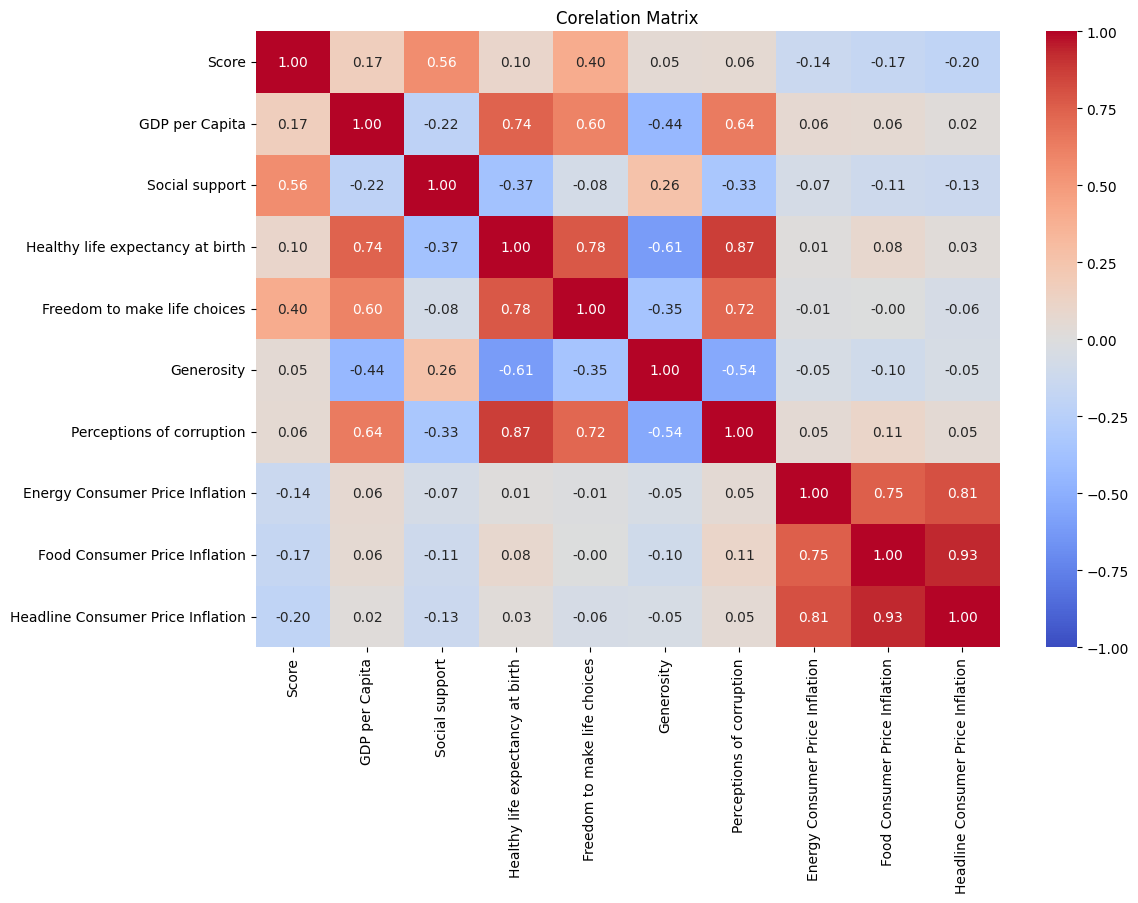

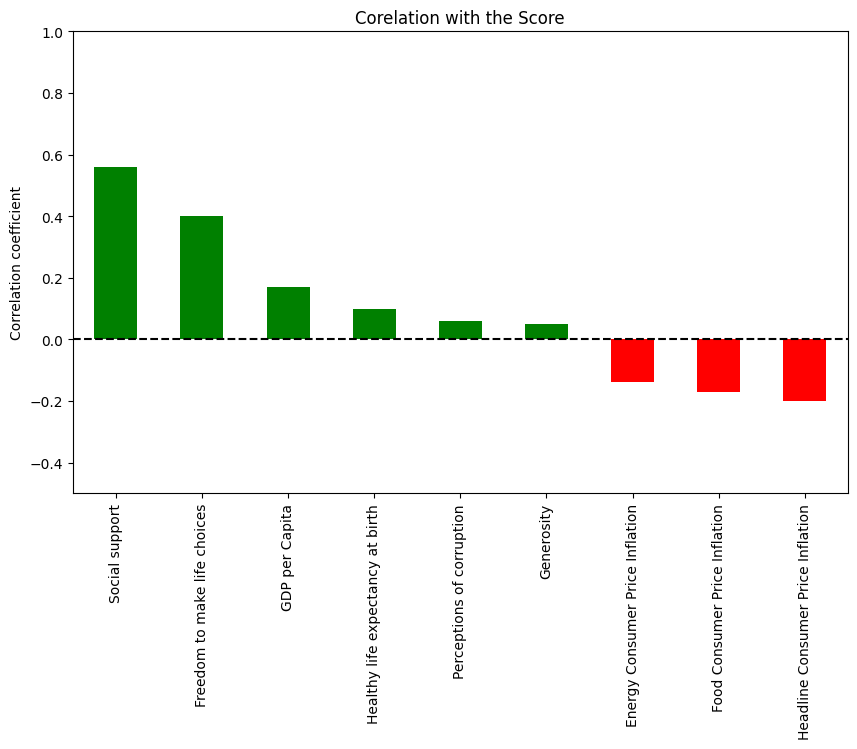

In [88]:
numeric_columns = ['Score', 'GDP per Capita', 'Social support', 
                  'Healthy life expectancy at birth', 'Freedom to make life choices',
                  'Generosity', 'Perceptions of corruption', 
                  'Energy Consumer Price Inflation', 'Food Consumer Price Inflation',
                  'Headline Consumer Price Inflation']

corr_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title("Corelation Matrix")
plt.show()
score_correlations = corr_matrix['Score'].drop('Score').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
score_correlations.plot(kind='bar', color=['green' if x > 0 else 'red' for x in score_correlations])
plt.title("Corelation with the Score")
plt.ylabel("Correlation coefficient")
plt.axhline(y=0, color='black', linestyle='--')
plt.ylim(-0.5, 1)
plt.show()

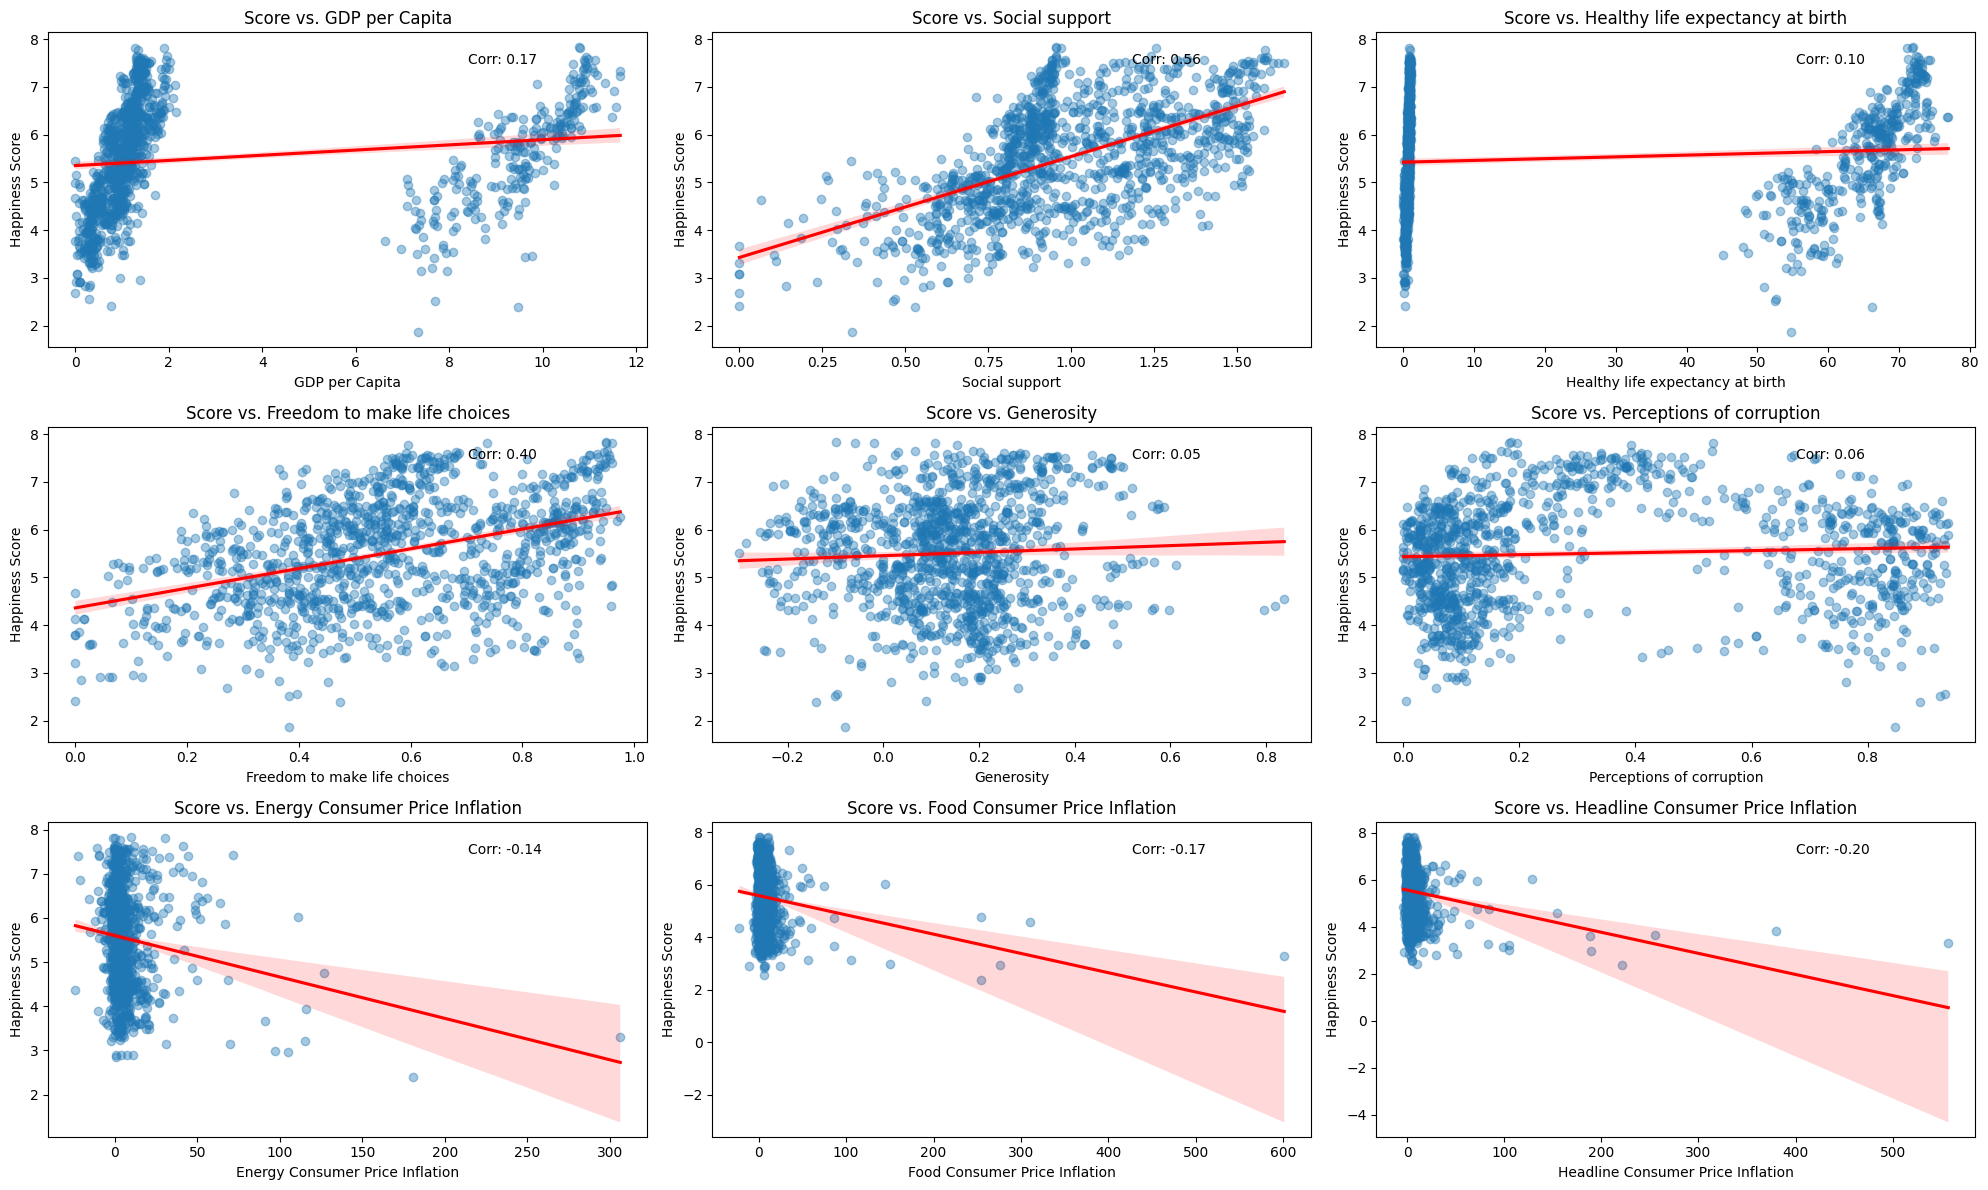

In [89]:
variables = [
'GDP per Capita', 
'Social support', 
'Healthy life expectancy at birth', 'Freedom to make life choices',
'Generosity', 'Perceptions of corruption', 
'Energy Consumer Price Inflation', 'Food Consumer Price Inflation',
'Headline Consumer Price Inflation'
]

plt.figure(figsize=(20, 12))
for i, var in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    sns.regplot(  
        x=var, 
        y='Score', 
        data=df, 
        scatter_kws={'alpha': 0.4}, 
        line_kws={'color': 'red'}
    )
    plt.title(f"Score vs. {var}")
    plt.xlabel(var)
    plt.ylabel("Happiness Score")

    corr = df[['Score', var]].corr().iloc[0, 1]
    plt.annotate(f"Corr: {corr:.2f}", xy=(0.7, 0.9), xycoords='axes fraction')

plt.tight_layout()
plt.show()

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df['Happiness_Category'] = pd.qcut(df['Score'], q=3, labels=['Low', 'Medium', 'High'])

features = [
    'GDP per Capita', 
    'Social support', 
    'Healthy life expectancy at birth', 
    'Freedom to make life choices',
    'Generosity', 
    'Perceptions of corruption', 
    'Energy Consumer Price Inflation', 
    'Food Consumer Price Inflation',
    'Headline Consumer Price Inflation'
]

df_clean = df.dropna(subset=features + ['Score'])
X = df_clean[features]
y = df_clean['Happiness_Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.6056338028169014
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

        High       0.60      0.76      0.67        76
         Low       0.74      0.68      0.71        68
      Medium       0.46      0.36      0.41        69

    accuracy                           0.61       213
   macro avg       0.60      0.60      0.59       213
weighted avg       0.60      0.61      0.60       213

Confusion Matrix (Logistic Regression):
[[58  4 14]
 [ 7 46 15]
 [32 12 25]]


In [92]:
from sklearn.svm import SVC

svm = SVC(random_state=42)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix (SVM):")
print(confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.5633802816901409
Classification Report (SVM):
              precision    recall  f1-score   support

        High       0.53      0.91      0.67        76
         Low       0.65      0.51      0.57        68
      Medium       0.53      0.23      0.32        69

    accuracy                           0.56       213
   macro avg       0.57      0.55      0.52       213
weighted avg       0.57      0.56      0.53       213

Confusion Matrix (SVM):
[[69  4  3]
 [22 35 11]
 [38 15 16]]


In [93]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix (Decision Tree):")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.6995305164319249
Classification Report (Decision Tree):
              precision    recall  f1-score   support

        High       0.75      0.72      0.74        76
         Low       0.82      0.78      0.80        68
      Medium       0.55      0.59      0.57        69

    accuracy                           0.70       213
   macro avg       0.71      0.70      0.70       213
weighted avg       0.71      0.70      0.70       213

Confusion Matrix (Decision Tree):
[[55  1 20]
 [ 1 53 14]
 [17 11 41]]


In [94]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report (KNN):")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix (KNN):")
print(confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.5868544600938967
Classification Report (KNN):
              precision    recall  f1-score   support

        High       0.65      0.76      0.70        76
         Low       0.60      0.62      0.61        68
      Medium       0.46      0.36      0.41        69

    accuracy                           0.59       213
   macro avg       0.57      0.58      0.57       213
weighted avg       0.57      0.59      0.58       213

Confusion Matrix (KNN):
[[58  6 12]
 [ 9 42 17]
 [22 22 25]]


In [95]:
from sklearn.ensemble import RandomForestClassifier
X = df_clean[features]
y = df_clean['Happiness_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8262910798122066
              precision    recall  f1-score   support

        High       0.89      0.82      0.85        76
         Low       0.87      0.91      0.89        68
      Medium       0.72      0.75      0.74        69

    accuracy                           0.83       213
   macro avg       0.83      0.83      0.83       213
weighted avg       0.83      0.83      0.83       213

Confusion Matrix:
[[62  0 14]
 [ 0 62  6]
 [ 8  9 52]]


| Model                 | Low    | Medium | High   | Average Accuracy |
|-----------------------|--------|--------|--------|-------------------|
| Logistic Regression   | 0.68   | 0.36   | 0.76   | 0.606             |
| SVM                   | 0.51   | 0.23   | 0.91   | 0.563             |
| Decision Tree         | 0.78   | 0.59   | 0.72   | 0.700             |
| KNN                   | 0.62   | 0.36   | 0.76   | 0.587             |
| Random Forest         | 0.91   | 0.75   | 0.82   | 0.826             |


**Model Performance Analysis**

* Random Forest demonstrates the strongest overall performance, achieving the highest average accuracy (82.6%). It maintains balanced recall across all classes.

* SVM exhibits a notable strength in classifying High happiness countries (91% recall), outperforming even Random Forest for this class. However, its performance drops significantly for Medium (23%) and Low (51%) classes, indicating a potential bias toward the majority class or difficulty handling imbalanced data.

* Decision Tree provides the second-best overall accuracy (70%) with moderate recall across classes.

* Logistic Regression and KNN show weaknesses, particularly for the Medium class (36% recall for both). Their lower accuracy (~60%) suggests they struggle with non-linear patterns or class imbalances in the data.


**Recommendations**

* Random Forest is the optimal choice for balanced multi-class predictions.
* SVM could be used in scenarios where prioritizing "High" happiness country detection is critical, provided other classes are less important.
